In [1]:
import pandas as pd

#header csv檔是否有原本的標頭欄位

In [3]:

columns = ['sepal_length','sepal_width','petal_length','petal_width','class']

df = pd.read_csv('C:\\Users\\Ocean\\Downloads\\iris.data',names=columns, header=None)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
import matplotlib.pyplot as plt

import seaborn as sns

In [14]:
plt.style.use('ggplot') #ggplot

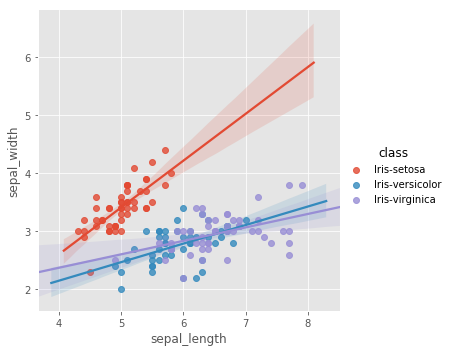

In [15]:
sns.lmplot('sepal_length','sepal_width' , data=df,fit_reg = True , hue='class')

#hue的重要分類
#print plt.style.available

#lmplot 是什麼

In [33]:
#都可以繪製線性迴歸曲線。這兩個函式非常相似，甚至共有一些核心功能。我將著力講解二者的區別，這會幫助你選用恰當的工具。
#在最簡單的呼叫中，兩個函式都會畫出雙變數的散點圖，然後以y~x擬合迴歸方程和預測值95%置信區間並將其畫出。

In [11]:
print(plt.style.available)
#樣式美化的函數

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


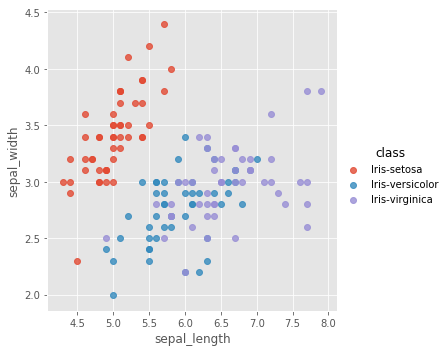

In [17]:
sns.lmplot('sepal_length','sepal_width' , data=df,fit_reg = False , hue='class')
#the same plot as above , the only difference is there is no regression line there


#lmplot()绘制回归关系图
#lmplot是一种集合基础绘图与基于数据建立回归模型的绘图方法。旨在创建一个方便拟合数据集回归模型的绘图方法，利用hue、col、row参数来控制绘图变量。
#hue的重要分類


In [24]:
import numpy as np

import numpy.random 

from sklearn.model_selection import train_test_split , cross_val_score

x = df.iloc[:,0:-1] # iloc的寫法
y = df.iloc[:,-1].values # values 是為了轉換array




In [25]:
x_train,x_test,y_train,y_test = train_test_split(x, y ,test_size=0.3 , random_state = 0 )

In [26]:
from sklearn.neighbors import KNeighborsClassifier as KNN

## K-Nearest-Neighborhood

In [28]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [29]:
knn = KNN(n_neighbors = 3)

In [30]:
knn.fit(x_train,y_train) #需要為原先已經的樣本進行標籤分類  訓練出模型  , 才能在未來為未知的樣本進行分類預測

#metric= minkowski距離是預設值

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [31]:
pred = knn.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score # _score

In [33]:
score = accuracy_score(y_test,pred) #True value , and Predicted value 判別分類的精確度

In [35]:
score

0.9777777777777777

In [38]:
# cross validation 方法是用來最高效率的使用樣本來訓練模型的方法

# scoring 可以直接判斷精準度

# 會輸出10個accuracy_score 的 array

score_val = cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy') 

In [41]:
score_val.mean() #平均分數

0.943888888888889

In [98]:
#knn cross_validation

#knn 的 n_neightbors會盡可能地選擇奇數  更容易進行majority vote的判斷

# 重要部分的化簡

#完整cross_validation 的方法已經包含了測試集了

neighbors = [x for x in range(1,50,2)]

scores = []

for n in neighbors:

    knn = KNN(n_neighbors=n)
    
    score_val = cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy').mean()
    scores.append(score_val)

In [99]:
scores

[0.943888888888889,
 0.943888888888889,
 0.9525757575757575,
 0.9605555555555556,
 0.9605555555555556,
 0.9605555555555556,
 0.9605555555555556,
 0.9605555555555556,
 0.9605555555555556,
 0.9514646464646465,
 0.9514646464646465,
 0.9431313131313133,
 0.9347979797979798,
 0.9459090909090909,
 0.9459090909090909,
 0.9559090909090908,
 0.9447979797979797,
 0.9459090909090909,
 0.9459090909090909,
 0.9459090909090909,
 0.9347979797979798,
 0.9257070707070707,
 0.9368181818181818,
 0.9273737373737374,
 0.9073737373737375]

In [51]:
n_neighbors = [n for n in range(1,50,2)]

n_neighbors_scores = []

In [55]:
#完整的cross_validation 的方法已經包含測試集的部分了 不必再區分訓練及與測試集
 

for n in n_neighbors :
    knn = KNN(n_neighbors=n)
    n_neighbors_scores.append(cross_val_score(knn,x,y,cv=10,scoring='accuracy').mean())

In [54]:
len(n_neighbors_scores) # 25個不同的n-nearest 鄰近數量

25